# Dependencies

In [ ]:
pip install -q tensorflow-text

In [ ]:
pip install -q tf-models-official

In [ ]:
import os
import tensorflow as tf
import shutil
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization 
import matplotlib.pyplot as plt
tf.get_logger().setLevel('ERROR')

# Read Data

In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [ ]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.4.0
Eager execution: True


In [ ]:
url = "http://storage.googleapis.com/download.tensorflow.org/data/stack_overflow_16k.tar.gz"

dataset = tf.keras.utils.get_file("stack_overflow_16k.tar.gz", url,
                                    untar=True, cache_dir='.',
                                    cache_subdir='')

dataset_dir = os.path.dirname(dataset)

train_dir = os.path.join(dataset_dir, 'train')
test_dir = os.path.join(dataset_dir, 'test')

6053888/6053168 [==============================] - 0s 0us/step


In [ ]:
os.listdir(train_dir)

['csharp', 'python', 'javascript', 'java']

In [ ]:
os.listdir(test_dir)

['csharp', 'python', 'javascript', 'java']

In [ ]:
sample_file = os.path.join(train_dir, 'python/0.txt')
with open(sample_file) as f:
  print(f.read())

"is it legal to define two methods with the same name but different returning types? i've written a piece of code to determine a typical palindrome string. i did this by the definition of a reverse() method returning a string. i also eager to have the same method, but in the void form, because of some future needs..as i add the latter to the code, the valid output will become invalid..so, the question is that is it legal to define two methods with the same name but different returning types?.if not, please let me know how to write this code with the void-type method...class detector(object):.    def __init__(self,string):.        self.string = string..    forbidden = (' ','!','?','.','-','_','&amp;','%',""#"","","")..    def eliminator(self):.        for item in self.forbidden:.            if item in self.string:.                self.string = self.string.replace(item,"""")..    def reverse(self):.        return self.string[::-1]            ..    #def reverse(self):.    #    self.string

# Choosing BERT Model

In [ ]:
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8' 

map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/1',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/2',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/2',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/2',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')


BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/2


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

#Prepare train data:

In [ ]:
from pathlib import Path

sample_files = Path(os.path.join(train_dir, 'python'))
python_questions = []


for sample_file in sample_files.iterdir():
  with open(sample_file) as f:
    python_questions.append(f.read())
python_questions[0]

'"file handling techniques in blank how do i read a file by opening that particular file instead of printing it on the console? i\'ve used the following code but it prints the contents of the file on the console...fw=open(""x.txt"",\'r+\').#fw.write(""hellon"").#fw.write(""blank is crazy af"").n=fw.read().print(n).fw.close()"\n'

In [ ]:
sample_files = Path(os.path.join(train_dir, 'java'))
java_questions = []

for sample_file in sample_files.iterdir():
  with open(sample_file) as f:
    java_questions.append(f.read())
java_questions[0]

'"blank set of bytes can anyone help me to know how can i have a ""set"" of bytes in blank?.thank you"\n'

In [ ]:
sample_files = Path(os.path.join(train_dir, 'javascript'))
javascript_questions = []


for sample_file in sample_files.iterdir():
  with open(sample_file) as f:
    javascript_questions.append(f.read())
javascript_questions[0:2]

["return loop getelementsbyclassname not work is a public question discussed in various communities.i have not gotten the return of a simple loop works like this:..see jsfiddle..function classname(cls){.  var divs = document.getelementsbyclassname(cls);.   for(var i=0; i&lt;divs.length; i++) { .     a = divs[i].   }.    return a;.}.//example use.classname('source').style.display='block';...is important to use native blank\n",
 '"why does console.log return undefined after correct output? i\'m writing a very simple js function and was wondering if the console returning \'undefined\' after correctly logging every function call was normal or an error as a result of a badly written function...const getweather = function(country, weathertype) {.    console.log(\'the weather in \' + country + \' is \' + weathertype + \'.\');.}..console.log(getweather(\'scotland\', \'sunny\'));.console.log(getweather(\'japan\', \'beautiful\'));.console.log(getweather(\'germany\', \'frosty\'));"\n']

In [ ]:
sample_files = Path(os.path.join(train_dir, 'csharp'))
csharp_questions = []

for sample_file in sample_files.iterdir():
  with open(sample_file) as f:
    csharp_questions.append(f.read())
csharp_questions[0]

'"blank directoryinfo getfiles returns empty array i am trying to read a file from directory with blank directoryinfo.getfiles but it returns an empty array. even though there is a file in the folder, it has all the access permissions and there is no exception thrown..although, when i try to run the line in ""immediate window"" (vs 2010) it gets the file from the directory properly...i was googling but, so far i found no answer..is there something i missed? ..the code is pretty simple:..         try.        {..            directoryinfo pathdir = new directoryinfo(this.path);..            fileinfo[] files = pathdir.getfiles();..            foreach (fileinfo file in files).            {.                xmldocument xml = new xmldocument();.                xml.load(file.fullname);..                // doing something with xml here   .            }..        }.        catch (exception exc).        {.            console.writeline(""the following error has occured: "" + exc.message.tostring());

In [ ]:
len(python_questions)

2000

In [ ]:
len(java_questions)

2000

In [ ]:
len(csharp_questions)

2000

In [ ]:
len(javascript_questions)

2000

In [ ]:
#labels

# python-0
python_label = [0 for i in range(2000)]

# java-1
java_label = [1 for i in range(2000)]

# csharp-2
c_sharp_label = [2 for i in range(2000)]

# javascript-3
javascript_label = [3 for i in range(2000)]

In [ ]:
javascript_label[0:6]

[3, 3, 3, 3, 3, 3]

In [ ]:
import numpy as np
python_train = np.stack((python_questions, python_label), axis=-1) 
java_train = np.stack((java_questions, java_label), axis=-1)
javascript_train = np.stack((javascript_questions, javascript_label), axis=-1)
csharp_train = np.stack((csharp_questions, c_sharp_label), axis=-1)

In [ ]:
python_train[0:6]

array([['"file handling techniques in blank how do i read a file by opening that particular file instead of printing it on the console? i\'ve used the following code but it prints the contents of the file on the console...fw=open(""x.txt"",\'r+\').#fw.write(""hellon"").#fw.write(""blank is crazy af"").n=fw.read().print(n).fw.close()"\n',
        '0'],
       ['"rounding to 2 decimal places in blank this isn\'t a duplicate because i have checked everything before this post on this site. i think i have managed to do the first two bullet points. the first one i will do through a string but i am willing to change that if you know another way. the 2nd one is using comma seperators for the $\'s. so i will use a float but once again am willing to change if better way is found. ..but i am stuck..and the ""print(""%.2f"") % str) is something i found but i need work on rounding to two decimal spaces and the last bullet point...code:..import random...def random_number():.    random_dollars = rand

In [ ]:
train_data = []
step_1 = np.row_stack((python_train , javascript_train)) 
step_2 = np.row_stack((csharp_train,java_train)) 

train_data = np.row_stack((step_1 , step_2)) 

In [ ]:
train_data

array([['"file handling techniques in blank how do i read a file by opening that particular file instead of printing it on the console? i\'ve used the following code but it prints the contents of the file on the console...fw=open(""x.txt"",\'r+\').#fw.write(""hellon"").#fw.write(""blank is crazy af"").n=fw.read().print(n).fw.close()"\n',
        '0'],
       ['"rounding to 2 decimal places in blank this isn\'t a duplicate because i have checked everything before this post on this site. i think i have managed to do the first two bullet points. the first one i will do through a string but i am willing to change that if you know another way. the 2nd one is using comma seperators for the $\'s. so i will use a float but once again am willing to change if better way is found. ..but i am stuck..and the ""print(""%.2f"") % str) is something i found but i need work on rounding to two decimal spaces and the last bullet point...code:..import random...def random_number():.    random_dollars = rand

In [ ]:
len(train_data)

8000

In [ ]:
train_data.shape

(8000, 2)

In [ ]:
train_data = train_data.tolist()

In [ ]:
import random

random.shuffle(train_data)

train_data

[['"purpose of string args[] in main method in blank in blank main method, what\'s the purpose of string args[] in ..public static void main (string args[])  ?"\n',
  '1'],
 ['"printing match from tree i am trying to create a ""word completion"" tree blank program from a dictionary that is a text file but i am not sure where to go from here. the word completion program will match any words that start with the string entered. i am new to blank/ programming. i have designed the tree as a multi way tree with each node storing a character as a letter and a boolean variable to indicate if it is the end of the word (amongst other things). ..i am at the point where i am trying to see if my reading in of the file into the tree is working correct. however when i try to print my tree, it is not working correctly. it is not displaying the first letter correctly in every word after the first word. instead of reading in from file, for testing purposes i am simply adding only 4 words to tree (base, 

Check:

In [ ]:
counter = 0

for i in range(8000):
  if train_data[i][1] != '0':
    #print(i)
    counter = counter +1
counter

6000

In [ ]:
zero_counter = 0
for i in range(8000):
  if train_data[i][1] == '0':
    zero_counter = zero_counter +1
zero_counter

2000

In [ ]:
train_data = np.array(train_data)

In [ ]:
train_lables = [train_data[i][1] for i in range(len(train_data))]

In [ ]:
train_lables = np.array(train_lables)

In [ ]:
train_text = [(train_data[i][0]) for i in range(len(train_data))]

In [ ]:
train_text[0:4]

['"how can i restrict the type of data my users enter at the class level i have the following class:..public class reference : auditabletable.{.     [range(0, 99, errormessage = ""{0} must be between {1} and {2}"")].     [displayname(""order"")].     public int order { get; set; .}...with mvc the range check should stop the user entering bad data. however my other code that does not go through the mvc front end allows me to enter in values like 999. is it normal to have checking at the class level for this and how could i implement it ?"\n',
 '"import class defined in same module file? i have a module file called mymodule.py, which contains the following code:..class foo:.    def __init__(self):.        self.foo = 1..class bar:.    import foo.    def __init__(self):.        self.bar = foo().foo...the __init__.py file in the same directory has ..from mymodule import foo...from a script in the same directory, i have the following code:..from mymodule import bar...when i try to run bar(),

In [ ]:
text_preprocessed = bert_preprocess_model(train_text[0:2])

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_word_ids', 'input_mask', 'input_type_ids']
Shape      : (2, 128)
Word Ids   : [  101  1000  2129  2064  1045 21573  1996  2828  1997  2951  2026  5198]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 1]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Pooled Outputs Shape:(2, 512)
Pooled Outputs Values:[ 0.8052165   0.9196759  -0.10763518  0.08772402  0.3751011   0.99582756
  0.9803711  -0.97921675 -0.5715137  -0.99719936  0.01447969 -0.97934777]
Sequence Outputs Shape:(2, 128, 512)
Sequence Outputs Values:[[ 0.55008876 -0.09212527  0.37560347 ... -0.40712076 -0.7287816
   0.5121347 ]
 [ 1.3091853  -0.41424125  0.05394219 ...  1.1341105   1.4536362
  -0.10611136]
 [ 0.7353548  -0.13304532  0.7719456  ... -0.0475863  -0.02066921
   0.92606115]
 ...
 [-0.5116434  -0.08705666 -0.00552161 ...  0.7444707  -0.85050815
  -0.30112383]
 [ 0.10253173  0.7257089   0.11085883 ... -0.7724762  -0.3130212
   1.696623  ]
 [-1.1449857   0.00529889  0.6531555  ... -0.814863    0.3579732
   0.90846866]]


In [ ]:
type(train_text)

list

In [ ]:
x_train = np.array(train_text)

In [ ]:
y_train = [int(i) for i in train_lables]

In [ ]:
type(y_train)

list

In [ ]:
y_train = np.array(y_train)
y_train

array([1, 1, 2, ..., 3, 2, 1])

In [ ]:
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=4)

In [ ]:
y_train_categorical

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]], dtype=float32)

#Prepare test data:

In [ ]:
sample_files = Path(os.path.join(test_dir, 'python'))
python_questions_test = []

for sample_file in sample_files.iterdir():
  with open(sample_file) as f:
    python_questions_test.append(f.read())
python_questions_test[0:6]

['"blankic way of converting a list embedded in a string to a list i am not sure if there is a solution for this on stack overflow; so apologies if this is a duplicate...there are number of ways of converting the string:..s = \'[1, 2, 3]\'...to a list..t = [1, 2, 3]...but i am looking for the most straightforward blankic way of doing this. also, performance matters."\n',
 '"unable to create a label in a new col with existing rules i want to create a new col which indicates high, medium or low, based on the values from existing col...syntaxerror: unexpected eof while parsing.data..import numpy as np.df_s9[\'t4 label\'] = np.where(df_s9.iloc[:,3].astype(float)&lt;=5.4,\'low\', np.where(df_s9.iloc[:,3].astype(float)&gt; 5.6 and df_s9.iloc[:,3].astype(float) &lt;11,\'normal\', df_s9.iloc[:,3].astype(float)&gt;11,""high"")"\n',
 '"difference between list and map for getting multiple user inputs what is the difference between list(int(input()).split()) and map(int,input().split()) for gettin

In [ ]:
sample_files = Path(os.path.join(test_dir, 'java'))
java_questions_test = []

for sample_file in sample_files.iterdir():
  with open(sample_file) as f:
    java_questions_test.append(f.read())
#java_questions_test

In [ ]:
sample_files = Path(os.path.join(test_dir, 'javascript'))
javascript_questions_test = []


for sample_file in sample_files.iterdir():
  with open(sample_file) as f:
    javascript_questions_test.append(f.read())
#javascript_questions_test

In [ ]:
sample_files = Path(os.path.join(test_dir, 'csharp'))
csharp_questions_test = []

for sample_file in sample_files.iterdir():
  with open(sample_file) as f:
    csharp_questions_test.append(f.read())
#csharp_questions_test

In [ ]:
print(len(python_questions_test), len(java_questions_test), len(csharp_questions_test), len(javascript_questions_test))

2000 2000 2000 2000


In [ ]:
#labels
# python-0
python_label_test = [0 for i in range(2000)]

# java-1
java_label_test = [1 for i in range(2000)]

# csharp-2
c_sharp_label_test = [2 for i in range(2000)]

# javascript-3
javascript_label_test = [3 for i in range(2000)]

In [ ]:
import numpy as np
python_test = np.stack((python_questions_test, python_label_test), axis=-1) 
java_test = np.stack((java_questions_test, java_label_test), axis=-1)
javascript_test = np.stack((javascript_questions_test, javascript_label_test), axis=-1)
csharp_test = np.stack((csharp_questions_test, c_sharp_label_test), axis=-1)

In [ ]:
python_test[0:6]

array([['"blankic way of converting a list embedded in a string to a list i am not sure if there is a solution for this on stack overflow; so apologies if this is a duplicate...there are number of ways of converting the string:..s = \'[1, 2, 3]\'...to a list..t = [1, 2, 3]...but i am looking for the most straightforward blankic way of doing this. also, performance matters."\n',
        '0'],
       ['"unable to create a label in a new col with existing rules i want to create a new col which indicates high, medium or low, based on the values from existing col...syntaxerror: unexpected eof while parsing.data..import numpy as np.df_s9[\'t4 label\'] = np.where(df_s9.iloc[:,3].astype(float)&lt;=5.4,\'low\', np.where(df_s9.iloc[:,3].astype(float)&gt; 5.6 and df_s9.iloc[:,3].astype(float) &lt;11,\'normal\', df_s9.iloc[:,3].astype(float)&gt;11,""high"")"\n',
        '0'],
       ['"difference between list and map for getting multiple user inputs what is the difference between list(int(input())

In [ ]:
len(python_test)

2000

In [ ]:
test_data = []
step_1 = np.row_stack((python_test , javascript_test)) 
step_2 = np.row_stack((csharp_test,java_test)) 

test_data = np.row_stack((step_1 , step_2)) 

In [ ]:
test_data[0:6]

array([['"blankic way of converting a list embedded in a string to a list i am not sure if there is a solution for this on stack overflow; so apologies if this is a duplicate...there are number of ways of converting the string:..s = \'[1, 2, 3]\'...to a list..t = [1, 2, 3]...but i am looking for the most straightforward blankic way of doing this. also, performance matters."\n',
        '0'],
       ['"unable to create a label in a new col with existing rules i want to create a new col which indicates high, medium or low, based on the values from existing col...syntaxerror: unexpected eof while parsing.data..import numpy as np.df_s9[\'t4 label\'] = np.where(df_s9.iloc[:,3].astype(float)&lt;=5.4,\'low\', np.where(df_s9.iloc[:,3].astype(float)&gt; 5.6 and df_s9.iloc[:,3].astype(float) &lt;11,\'normal\', df_s9.iloc[:,3].astype(float)&gt;11,""high"")"\n',
        '0'],
       ['"difference between list and map for getting multiple user inputs what is the difference between list(int(input())

In [ ]:
test_data.shape

(8000, 2)

In [ ]:
test_data = test_data.tolist()

In [ ]:
import random

random.shuffle(test_data)

#test_data

In [ ]:
test_data = np.array(test_data)

In [ ]:
test_labels = [int(test_data[i][1]) for i in range(len(test_data))]

In [ ]:
test_lables = np.array(test_labels)

In [ ]:
test_text = [(test_data[i][0]) for i in range(len(test_data))]

In [ ]:
test_text[0:2]

['"if i have a thread instance with variable name mythread, how can i find out if it is in the state runnable? i looked at this api but didn\'t find the information i was looking for:..http://docs.oracle.com/blankse/1.5.0/docs/api/blank/lang/thread.state.html#runnable"\n',
 'conversion of string like -2.0934e-6 to integer i am new to blank and i have to convert a string like -2.0934e-6 into a integer to do some calculation. i hope someone has an idea. thanks in advance. hermann..this is what i have done:..integer i = integer.parseint(c_column2);.out_colum2mod = i;\n']

In [ ]:
type(test_text)

list

In [ ]:
x_test = np.array(test_text)

In [ ]:
test_labels = [int(i) for i in test_labels]

In [ ]:
test_labels = np.array(test_labels)

In [ ]:
type(test_labels)

numpy.ndarray

In [ ]:
y_test_categorical = tf.keras.utils.to_categorical(test_labels, num_classes=4)

# Model

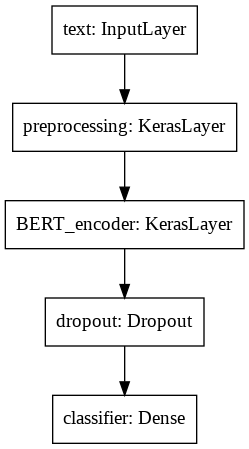

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.4)(net)
  net = tf.keras.layers.Dense(4, activation= 'softmax', name='classifier')(net)
  return tf.keras.Model(text_input, net)

classifier_model = build_classifier_model()

tf.keras.utils.plot_model(classifier_model)

In [ ]:
classifier_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text (InputLayer)               [(None,)]            0                                            
__________________________________________________________________________________________________
preprocessing (KerasLayer)      {'input_word_ids': ( 0           text[0][0]                       
__________________________________________________________________________________________________
BERT_encoder (KerasLayer)       {'pooled_output': (N 28763649    preprocessing[0][0]              
                                                                 preprocessing[0][1]              
                                                                 preprocessing[0][2]              
______________________________________________________________________________________________

In [ ]:
metrics = [tf.metrics.CategoricalCrossentropy(), 'accuracy']

In [ ]:
epochs = 10
steps_per_epoch = tf.data.experimental.cardinality(tf.data.Dataset.from_tensor_slices(x_train)).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

In [ ]:
classifier_model.compile(optimizer=optimizer,
                         loss ='categorical_crossentropy',
                         metrics=metrics)

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(x = x_train,
                               y = y_train_categorical,
                               batch_size=32,
                               validation_split= 0.2,
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/10
200/200 [==============================] - 60s 264ms/step - loss: 1.8630 - categorical_crossentropy: 1.8630 - accuracy: 0.2611 - val_loss: 1.4340 - val_categorical_crossentropy: 1.4340 - val_accuracy: 0.2587
Epoch 2/10
200/200 [==============================] - 53s 267ms/step - loss: 1.5850 - categorical_crossentropy: 1.5850 - accuracy: 0.2675 - val_loss: 1.2991 - val_categorical_crossentropy: 1.2991 - val_accuracy: 0.3913
Epoch 3/10
200/200 [==============================] - 54s 271ms/step - loss: 1.4359 - categorical_crossentropy: 1.4359 - accuracy: 0.3341 - val_loss: 1.1287 - val_categorical_crossentropy: 1.1287 - val_accuracy: 0.5125
Epoch 4/10
200/200 [==============================] - 53s 267ms/step - loss: 1.2532 - categorical_crossentropy: 1.2532 - accuracy: 0.4361 - val_loss: 1.0268 - val_categorical_crossentropy: 1.0268 - val_accuracy: 0.5725
Epoch 5/10
200/200 [============

In [ ]:
classifier_model.evaluate(x_test , y_test_categorical)

250/250 [==============================] - 30s 120ms/step - loss: 0.5621 - categorical_crossentropy: 0.5621 - accuracy: 0.7769


[0.5621014833450317, 0.5621014833450317, 0.7768750190734863]

dict_keys(['loss', 'categorical_crossentropy', 'accuracy', 'val_loss', 'val_categorical_crossentropy', 'val_accuracy'])


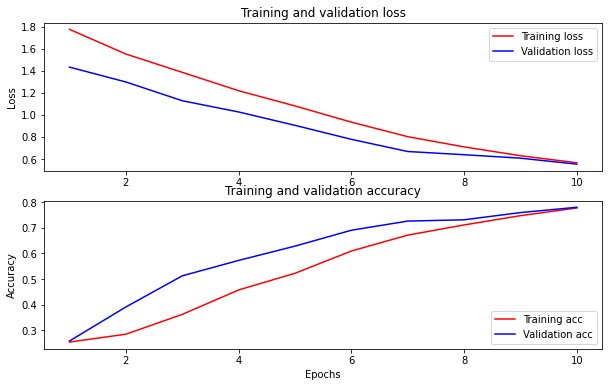

In [ ]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')